# Stock Price Prediction Supervised Learning


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Importing libraries

In [11]:
import pandas as pd
import numpy as np

import math,datetime
import time

import matplotlib.pyplot as plt
from matplotlib import style

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import model_selection
from sklearn.model_selection import train_test_split


#style.use ('ggplot')

### Loading Dataset

In [12]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Stock prediction project/GOOG2.csv',index_col='Date',parse_dates=True)

In [13]:
print(df.head())

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2004-08-19  49.813286  51.835709  47.800831  49.982655  49.982655  44871300
2004-08-20  50.316402  54.336334  50.062355  53.952770  53.952770  22942800
2004-08-23  55.168217  56.528118  54.321388  54.495735  54.495735  18342800
2004-08-24  55.412300  55.591629  51.591621  52.239193  52.239193  15319700
2004-08-25  52.284027  53.798351  51.746044  52.802086  52.802086   9232100


In [14]:
df.drop(['Adj Close'], axis=1)

,Open,High,Low,Close,Volume
Date,,,,,
2004-08-19,49.813286,51.835709,47.800831,49.982655,44871300
2004-08-20,50.316402,54.336334,50.062355,53.952770,22942800
2004-08-23,55.168217,56.528118,54.321388,54.495735,18342800
2004-08-24,55.412300,55.591629,51.591621,52.239193,15319700
2004-08-25,52.284027,53.798351,51.746044,52.802086,9232100
...,...,...,...,...,...
2020-04-22,1245.540039,1285.613037,1242.000000,1263.209961,2093100
2020-04-23,1271.550049,1293.310059,1265.670044,1276.310059,1566200
2020-04-24,1261.170044,1280.400024,1249.449951,1279.310059,1640400


In [15]:
#!pip3 install --upgrade pandas

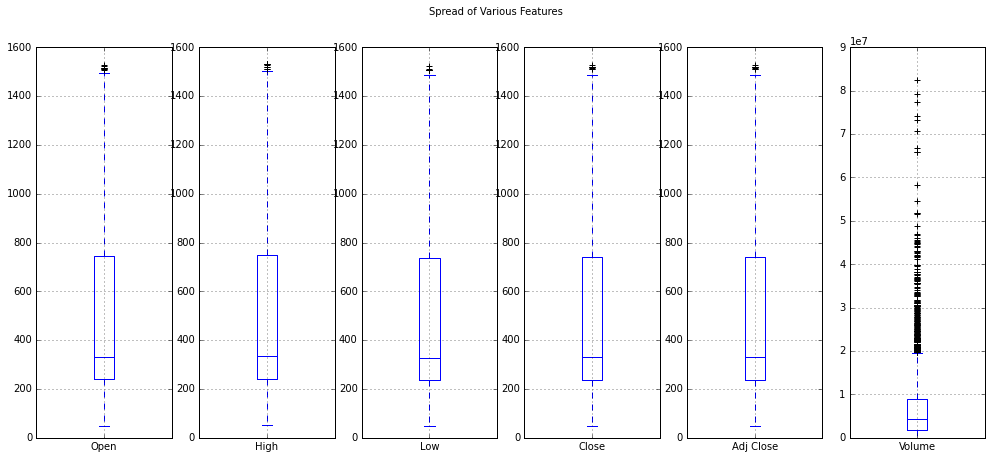

In [18]:
pd.__version__

# plt.style.use('classic')

ax = df.plot(kind = 'box', subplots = True, layout = (1,6), sharex = False, sharey = False , title="Spread of Various Features", figsize=(17,7), grid=True, color= "blue")
#ax = df.plot(kind = 'box', subplots = True, layout = (1,6), sharex = False, sharey = False ,figsize=(15,7), grid=True)



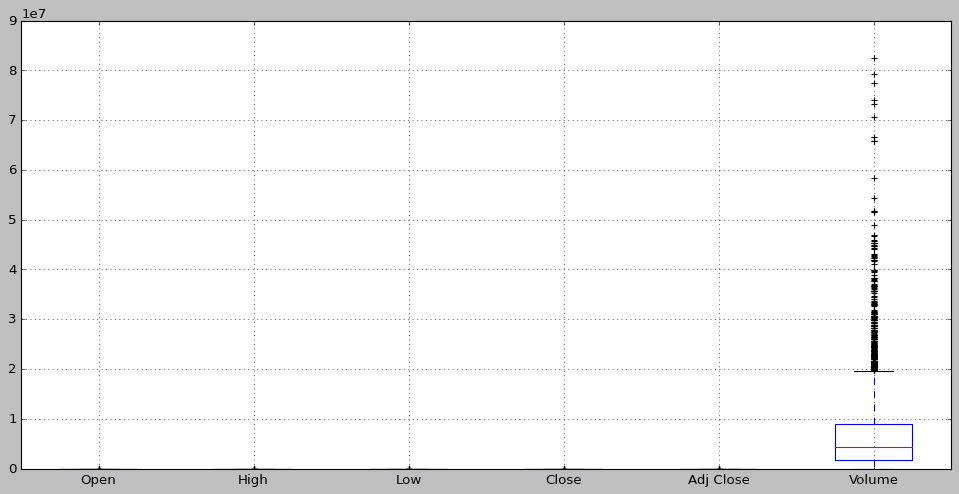

In [ ]:
import matplotlib.pyplot as plt
df.boxplot(figsize=(15,7))
plt.show()

ValueError: ignored

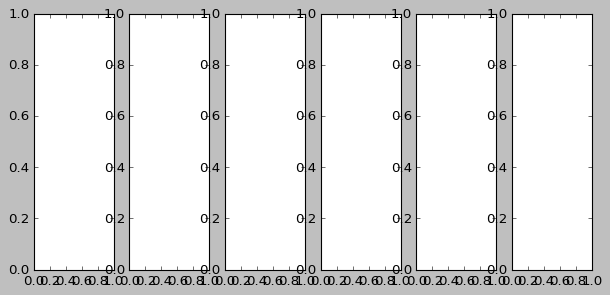

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['Open', 'High', 'Low', 'Close', 'Volume']

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(9, 4))

# rectangular box plot
bplot1 = axes[0].boxplot(df,
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
axes[0].set_title('Rectangular box plot')


# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xlabel('Three separate samples')
    ax.set_ylabel('Observed values')


In [ ]:
df.hist(figsize = (10,10))

In [ ]:
'''#Skewness before and after applying Log transformation
print(df['Close'].skew())
Cskew = np.log(df['Close'])
print(Cskew.skew())

print(df['Volume'].skew())
vskew = np.log(df['Volume'])
print(vskew.skew())
'''

In [ ]:
# Percentage change in Open and Close Price 
df['OC_Change'] = (df['Close']-df['Open'])/df['Open']*100

In [ ]:
# Percentage change in High and Low Price 
df['HL_Change'] = (df['High']-df['Low'])/df['Low']*100

In [ ]:
df = df[['Close','HL_Change','OC_Change','Volume']]

In [ ]:
print(df.tail()) 

In [ ]:
Close1 = df['Close'][-41:-1]
print(Close1)
len(Close1)
Close2 = Close1.to_numpy()
print(Close2)

Date
2020-03-02    1389.109985
2020-03-03    1341.390015
2020-03-04    1386.520020
2020-03-05    1319.040039
2020-03-06    1298.410034
2020-03-09    1215.560059
2020-03-10    1280.390015
2020-03-11    1215.410034
2020-03-12    1114.910034
2020-03-13    1219.729980
2020-03-16    1084.329956
2020-03-17    1119.800049
2020-03-18    1096.800049
2020-03-19    1115.290039
2020-03-20    1072.319946
2020-03-23    1056.619995
2020-03-24    1134.459961
2020-03-25    1102.489990
2020-03-26    1161.750000
2020-03-27    1110.709961
2020-03-30    1146.819946
2020-03-31    1162.810059
2020-04-01    1105.619995
2020-04-02    1120.839966
2020-04-03    1097.880005
2020-04-06    1186.920044
2020-04-07    1186.510010
2020-04-08    1210.280029
2020-04-09    1211.449951
2020-04-13    1217.560059
2020-04-14    1269.229980
2020-04-15    1262.469971
2020-04-16    1263.469971
2020-04-17    1283.250000
2020-04-20    1266.609985
2020-04-21    1216.339966
2020-04-22    1263.209961
2020-04-23    1276.310059
2020-04

### Features & Labels

In [ ]:
forecast_Col = 'Close'
forecast_out = int(math.ceil(0.01*len(df)))
df['label'] = df[forecast_Col].shift(-forecast_out)
print(df['label'])

Date
2004-08-19    71.785927
2004-08-20    74.301498
2004-08-23    73.693779
2004-08-24    69.982689
2004-08-25    74.411087
                ...    
2020-04-22          NaN
2020-04-23          NaN
2020-04-24          NaN
2020-04-27          NaN
2020-04-28          NaN
Name: label, Length: 3950, dtype: float64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df.tail()

,Close,HL_Change,OC_Change,Volume,label
Date,,,,,
2020-04-22,1263.209961,3.511517,1.418655,2093100,NaN
2020-04-23,1276.310059,2.183825,0.374347,1566200,NaN
2020-04-24,1279.310059,2.477096,1.438348,1640400,NaN
2020-04-27,1275.880005,2.139482,-1.552469,1600600,NaN
2020-04-28,1233.670044,4.532552,-4.212962,2898600,NaN


In [ ]:
df.dropna(inplace=True)
df.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Close,HL_Change,OC_Change,Volume,label
Date,,,,,
2020-02-25,1388.449951,4.032117,-3.108866,2478300,1263.209961
2020-02-26,1393.180054,2.661345,-0.212010,2202400,1276.310059
2020-02-27,1318.089966,4.140235,-3.228205,2978300,1279.310059
2020-02-28,1339.329956,5.518491,4.839918,3790600,1275.880005
2020-03-02,1389.109985,4.827731,2.774469,2431500,1233.670044


### Data Splitting

In [ ]:
X  =  np.array(df.drop(['label'], axis = 1))
Y  =  np.array(df['label'])

In [ ]:
print(len(X),len(Y))

3910 3910


In [ ]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size = 0.2)

In [ ]:
a = np.shape(X_train)
b = np.shape(Y_train)
c = np.shape(X_test)
d = np.shape(Y_test)
print(a,b,c,d)

(3128, 4) (3128,) (782, 4) (782,)



# Linear Regression

In [ ]:
startlr = time.time()

lr = LinearRegression()
lr.fit(X_train,Y_train)

endlr = time.time()

time_lr = endlr-startlr

print('Training Time :- {}'.format(time_lr))

Training Time :- 0.032236576080322266


In [ ]:
accuracy = lr.score(X_test,Y_test)
print(accuracy)

0.9741743358814743


In [ ]:
len(Y_test)

782

In [ ]:
X = X[:-forecast_out]
X_old = X[-forecast_out:]

Forecast_set = lr.predict(X_old)
print(Forecast_set)

[1300.16649404 1299.65275272 1314.15126858 1318.65710631 1307.41766426
 1306.49373768 1306.00123288 1317.94958332 1340.72764887 1327.88288919
 1323.10848484 1309.9936782  1308.62273045 1302.87808689 1314.16569402
 1321.30987832 1321.04496607 1313.57929358 1296.85179004 1302.05873571
 1326.75267178 1335.48689171 1347.76397534 1349.85437897 1351.76482952
 1352.94540536 1357.05469564 1355.04143515 1367.99955904 1361.91784396
 1359.88540972 1363.10546616 1355.54490126 1356.37510667 1351.89939084
 1367.10044154 1359.25084781 1343.44932567 1344.57458368 1372.43087793]


In [ ]:
date= ['2020-03-03','2020-03-04','2020-03-05','2020-03-06','2020-03-09','2020-03-10','2020-03-11','2020-03-12','2020-03-13','2020-03-16',
       '2020-03-17','2020-03-18','2020-03-19','2020-03-20','2020-03-23','2020-03-24','2020-03-25','2020-03-26','2020-03-27','2020-03-30',
       '2020-03-31','2020-04-01','2020-04-02','2020-04-03','2020-04-06','2020-04-07','2020-04-08','2020-04-09','2020-04-13','2020-04-14',
       '2020-04-15','2020-04-16','2020-04-17','2020-04-20','2020-04-21','2020-04-22','2020-04-23','2020-04-24','2020-04-27','2020-04-28',]
cl = np.array(Close2)
pr = np.array(Forecast_set)
dataset11 = pd.DataFrame({'Date': date, 'Close': cl, 'Prediction': pr}, columns=['Date', 'Close', 'Prediction'])
print(dataset11)
print(dataset11.tail(10))

          Date        Close   Prediction
0   2020-03-03  1389.109985  1300.166494
1   2020-03-04  1341.390015  1299.652753
2   2020-03-05  1386.520020  1314.151269
3   2020-03-06  1319.040039  1318.657106
4   2020-03-09  1298.410034  1307.417664
5   2020-03-10  1215.560059  1306.493738
6   2020-03-11  1280.390015  1306.001233
7   2020-03-12  1215.410034  1317.949583
8   2020-03-13  1114.910034  1340.727649
9   2020-03-16  1219.729980  1327.882889
10  2020-03-17  1084.329956  1323.108485
11  2020-03-18  1119.800049  1309.993678
12  2020-03-19  1096.800049  1308.622730
13  2020-03-20  1115.290039  1302.878087
14  2020-03-23  1072.319946  1314.165694
15  2020-03-24  1056.619995  1321.309878
16  2020-03-25  1134.459961  1321.044966
17  2020-03-26  1102.489990  1313.579294
18  2020-03-27  1161.750000  1296.851790
19  2020-03-30  1110.709961  1302.058736
20  2020-03-31  1146.819946  1326.752672
21  2020-04-01  1162.810059  1335.486892
22  2020-04-02  1105.619995  1347.763975
23  2020-04-03  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


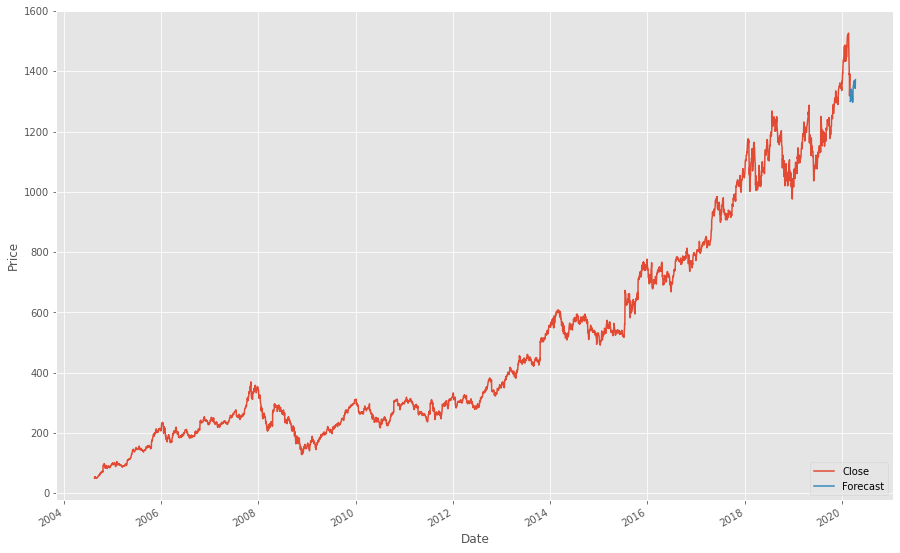

In [ ]:
df['Forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in Forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns) - 1)] + [i]

df['Close'].plot(figsize = (15,10))
df['Forecast'].plot(figsize = (15,10))
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Decision Tree

In [ ]:
startdt = time.time()

tree = DecisionTreeRegressor( max_depth=5)
tree.fit(X_train, Y_train)

enddt = time.time()

time_dt = enddt-startdt

print('Training Time :- {}'.format(time_dt))

print('Accuracy:- {}'.format(tree.score(X_test, Y_test)))

Training Time :- 0.010231494903564453
Accuracy:- 0.9847205195196789


In [ ]:
X = X[:-forecast_out]
X_old = X[-forecast_out:]

Forecast_set = tree.predict(X_old)
print(Forecast_set)

[1170.35262617 1170.35262617 1170.35262617 1170.35262617 1170.35262617
 1170.35262617 1170.35262617 1170.35262617 1114.83241711 1170.35262617
 1170.35262617 1170.35262617 1170.35262617 1170.35262617 1170.35262617
 1170.35262617 1170.35262617 1170.35262617 1170.35262617 1170.35262617
 1170.35262617 1170.35262617 1170.35262617 1170.35262617 1170.35262617
 1170.35262617 1170.35262617 1170.35262617 1170.35262617 1170.35262617
 1170.35262617 1242.8599977  1242.8599977  1242.8599977  1412.92729551
 1242.8599977  1242.8599977  1242.8599977  1242.8599977  1412.92729551]


In [ ]:
date= ['2020-03-03','2020-03-04','2020-03-05','2020-03-06','2020-03-09','2020-03-10','2020-03-11','2020-03-12','2020-03-13','2020-03-16',
       '2020-03-17','2020-03-18','2020-03-19','2020-03-20','2020-03-23','2020-03-24','2020-03-25','2020-03-26','2020-03-27','2020-03-30',
       '2020-03-31','2020-04-01','2020-04-02','2020-04-03','2020-04-06','2020-04-07','2020-04-08','2020-04-09','2020-04-13','2020-04-14',
       '2020-04-15','2020-04-16','2020-04-17','2020-04-20','2020-04-21','2020-04-22','2020-04-23','2020-04-24','2020-04-27','2020-04-28',]
cl = np.array(Close2)
pr = np.array(Forecast_set)
dataset11 = pd.DataFrame({'Date': date, 'Close': cl, 'Prediction': pr}, columns=['Date', 'Close', 'Prediction'])
print(dataset11)
print(dataset11.tail(10))

          Date        Close   Prediction
0   2020-03-03  1389.109985  1170.352626
1   2020-03-04  1341.390015  1170.352626
2   2020-03-05  1386.520020  1170.352626
3   2020-03-06  1319.040039  1170.352626
4   2020-03-09  1298.410034  1170.352626
5   2020-03-10  1215.560059  1170.352626
6   2020-03-11  1280.390015  1170.352626
7   2020-03-12  1215.410034  1170.352626
8   2020-03-13  1114.910034  1114.832417
9   2020-03-16  1219.729980  1170.352626
10  2020-03-17  1084.329956  1170.352626
11  2020-03-18  1119.800049  1170.352626
12  2020-03-19  1096.800049  1170.352626
13  2020-03-20  1115.290039  1170.352626
14  2020-03-23  1072.319946  1170.352626
15  2020-03-24  1056.619995  1170.352626
16  2020-03-25  1134.459961  1170.352626
17  2020-03-26  1102.489990  1170.352626
18  2020-03-27  1161.750000  1170.352626
19  2020-03-30  1110.709961  1170.352626
20  2020-03-31  1146.819946  1170.352626
21  2020-04-01  1162.810059  1170.352626
22  2020-04-02  1105.619995  1170.352626
23  2020-04-03  

# K-NN

In [ ]:
startknn = time.time()

knn = KNeighborsRegressor(13)
knn.fit(X_train, Y_train)

endknn = time.time()

time_knn = endknn - startknn

print('Training Time:- {}'.format(time_knn))
print('Accuracy:- {}'.format(knn.score(X_test, Y_test)))

Training Time:- 0.0061588287353515625
Accuracy:- 0.7018631905850572


In [ ]:
X = X[:-forecast_out]
X_old = X[-forecast_out:]

Forecast_set = knn.predict(X_old)
print(Forecast_set)

[1072.79926708 1000.47821062 1007.06922792  930.85312369  791.22398023
  843.29076215 1172.95845854  872.55922285  796.89306646  371.96081638
  675.07637146  849.51882708  881.56656123  819.33066969  791.22398023
  676.22585354  750.38516008  916.88627738  963.78598731  983.62302354
 1102.27907623  954.60477862  874.46823362  854.78322662  961.53520323
  947.06512931 1022.64542092  985.56055146 1042.40000562  691.71768185
  907.99750223 1076.24537538 1036.82567877 1090.50455892  932.29642646
  860.47555769 1001.76301931  983.52000077 1051.06307746  886.16368223]


In [ ]:
date= ['2020-03-03','2020-03-04','2020-03-05','2020-03-06','2020-03-09','2020-03-10','2020-03-11','2020-03-12','2020-03-13','2020-03-16',
       '2020-03-17','2020-03-18','2020-03-19','2020-03-20','2020-03-23','2020-03-24','2020-03-25','2020-03-26','2020-03-27','2020-03-30',
       '2020-03-31','2020-04-01','2020-04-02','2020-04-03','2020-04-06','2020-04-07','2020-04-08','2020-04-09','2020-04-13','2020-04-14',
       '2020-04-15','2020-04-16','2020-04-17','2020-04-20','2020-04-21','2020-04-22','2020-04-23','2020-04-24','2020-04-27','2020-04-28']

cl = np.array(Close2)
pr = np.array(Forecast_set)
dataset11 = pd.DataFrame({'Date': date, 'Close': cl, 'Prediction': pr}, columns=['Date', 'Close', 'Prediction'])
print(dataset11)
print(dataset11.tail(10))

          Date        Close   Prediction
0   2020-03-03  1389.109985  1072.799267
1   2020-03-04  1341.390015  1000.478211
2   2020-03-05  1386.520020  1007.069228
3   2020-03-06  1319.040039   930.853124
4   2020-03-09  1298.410034   791.223980
5   2020-03-10  1215.560059   843.290762
6   2020-03-11  1280.390015  1172.958459
7   2020-03-12  1215.410034   872.559223
8   2020-03-13  1114.910034   796.893066
9   2020-03-16  1219.729980   371.960816
10  2020-03-17  1084.329956   675.076371
11  2020-03-18  1119.800049   849.518827
12  2020-03-19  1096.800049   881.566561
13  2020-03-20  1115.290039   819.330670
14  2020-03-23  1072.319946   791.223980
15  2020-03-24  1056.619995   676.225854
16  2020-03-25  1134.459961   750.385160
17  2020-03-26  1102.489990   916.886277
18  2020-03-27  1161.750000   963.785987
19  2020-03-30  1110.709961   983.623024
20  2020-03-31  1146.819946  1102.279076
21  2020-04-01  1162.810059   954.604779
22  2020-04-02  1105.619995   874.468234
23  2020-04-03  

# Neural Network Implementation

In [ ]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### Loading Dataset for LSTM

In [ ]:
dfl = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Stock prediction project/GOOG2.csv',index_col="Date",parse_dates=True)
#Show the data
dfl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100
...,...,...,...,...,...,...
2020-04-22,1245.540039,1285.613037,1242.000000,1263.209961,1263.209961,2093100
2020-04-23,1271.550049,1293.310059,1265.670044,1276.310059,1276.310059,1566200
2020-04-24,1261.170044,1280.400024,1249.449951,1279.310059,1279.310059,1640400


### Preprocessing & Feature Extraction

In [ ]:
#Get the number of rows and columns in the data set
dfl.shape

(3950, 6)

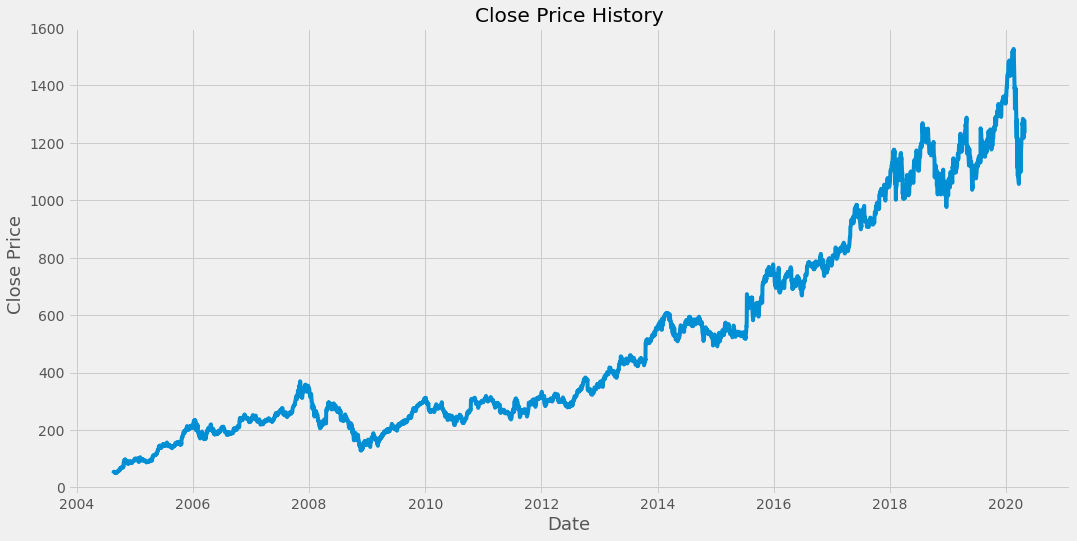

In [ ]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(dfl['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
plt.show()

In [ ]:

#Create a new dataframe with only the 'Close column
data = dfl.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

3160

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[1.11307572e-04],
       [2.79949983e-03],
       [3.16714518e-03],
       ...,
       [8.32497375e-01],
       [8.30174862e-01],
       [8.01594206e-01]])

In [ ]:
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_trainl = []
y_trainl = []

for i in range(60, len(train_data)):
    x_trainl.append(train_data[i-60:i, 0])
    y_trainl.append(train_data[i, 0])
    if i<= 61:
        print(x_trainl)
        print(y_trainl)
        print()

[array([1.11307572e-04, 2.79949983e-03, 3.16714518e-03, 1.63922502e-03,
       2.02036376e-03, 2.66458425e-03, 2.07095583e-03, 6.74577906e-04,
       7.96002809e-04, 8.09494841e-05, 5.05934276e-04, 0.00000000e+00,
       5.29544993e-04, 7.72392091e-04, 7.75765438e-04, 1.79437797e-03,
       2.52629803e-03, 3.87208117e-03, 4.04409815e-03, 4.70855872e-03,
       5.89581557e-03, 6.52654809e-03, 6.01386712e-03, 6.19600414e-03,
       7.01898898e-03, 6.68507168e-03, 6.15552940e-03, 9.05621676e-03,
       1.04795767e-02, 9.98038914e-03, 1.09855110e-02, 1.18219858e-02,
       1.29384126e-02, 1.25033138e-02, 1.31003129e-02, 1.27225495e-02,
       1.18894426e-02, 1.26112453e-02, 1.37917548e-02, 1.41627762e-02,
       1.48744535e-02, 1.65777640e-02, 1.61662732e-02, 1.36534686e-02,
       1.66519674e-02, 2.44264845e-02, 2.94757025e-02, 2.75868836e-02,
       2.89933816e-02, 3.14657108e-02, 3.05685205e-02, 3.23865099e-02,
       3.19952538e-02, 3.09159285e-02, 2.85650235e-02, 2.33876346e-02,
     

In [ ]:
#Convert the x_train and y_train to numpy arrays 
x_trainl, y_trainl = np.array(x_trainl), np.array(y_trainl)

In [ ]:
#Reshape the data
x_trainl = np.reshape(x_trainl, (x_trainl.shape[0], x_trainl.shape[1], 1))
x_trainl.shape

(3100, 60, 1)

## Build the LSTM model

In [ ]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape= (x_trainl.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
#Train the model
lstm_start = time.time()

history = model.fit(x_trainl, y_trainl, epochs=200, batch_size=32)
lstm_end = time.time()

total_lstm = lstm_end - lstm_start

Epoch 1/200
97/97 [==============================] - 3s 26ms/step - loss: 0.0035
Epoch 2/200
97/97 [==============================] - 3s 26ms/step - loss: 1.0713e-04
Epoch 3/200
97/97 [==============================] - 3s 27ms/step - loss: 1.0034e-04
Epoch 4/200
97/97 [==============================] - 3s 26ms/step - loss: 9.5232e-05
Epoch 5/200
97/97 [==============================] - 3s 27ms/step - loss: 9.3390e-05
Epoch 6/200
97/97 [==============================] - 3s 27ms/step - loss: 9.1281e-05
Epoch 7/200
97/97 [==============================] - 3s 26ms/step - loss: 8.9978e-05
Epoch 8/200
97/97 [==============================] - 3s 26ms/step - loss: 7.7677e-05
Epoch 9/200
97/97 [==============================] - 2s 26ms/step - loss: 7.9988e-05
Epoch 10/200
97/97 [==============================] - 3s 26ms/step - loss: 7.8808e-05
Epoch 11/200
97/97 [==============================] - 3s 26ms/step - loss: 8.0651e-05
Epoch 12/200
97/97 [==============================] - 2s 26ms/step 

In [ ]:
model.save("test_123.h5")

In [ ]:
import keras
from keras.models import load_model
from tensorflow.keras.models import load_model
new_model = load_model('test_123.h5')

In [ ]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_testl = []
y_testl = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_testl.append(test_data[i-60:i, 0])

In [ ]:
#Convert the data to a numpy array
x_testl = np.array(x_testl)

In [ ]:
#Reshape the data
x_testl = np.reshape(x_testl, (x_testl.shape[0], x_testl.shape[1], 1 ))

In [ ]:
#Get the models predicted price values 
predictionsl = model.predict(x_testl)
predictionsl = scaler.inverse_transform(predictionsl)

In [ ]:
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictionsl - y_testl)**2)))
rmse

30.2736708781226

In [ ]:
from sklearn.metrics import mean_squared_error
rr = mean_squared_error(y_testl, predictionsl)
#mse = sklearn.metrics.mean_squared_error(y_testl, predictionsl)

rmse1 = math.sqrt(rr)

print(rmse1)

30.2736708781226


### Visualizing Results of LSTM Model

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


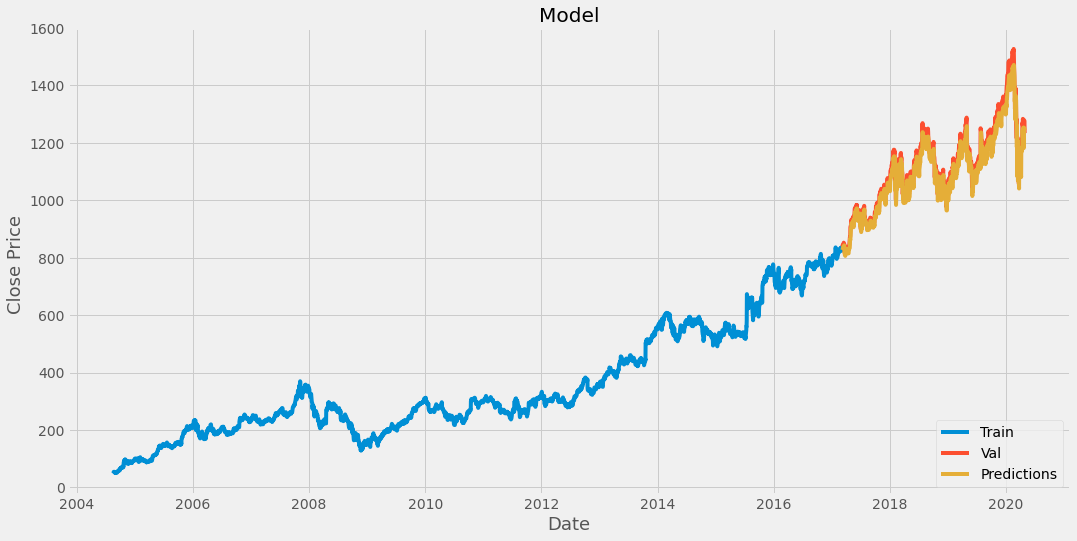

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictionsl
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2017-03-09,838.679993,826.841736
2017-03-10,843.250000,829.778442
2017-03-13,845.539978,834.269104
2017-03-14,845.619995,836.282654
2017-03-15,847.200012,835.988037
...,...,...
2020-04-22,1263.209961,1181.140015
2020-04-23,1276.310059,1236.606567
2020-04-24,1279.310059,1252.529907


In [ ]:
valid.tail(10)

,Close,Predictions
Date,,
2020-04-15,1262.469971,1244.119629
2020-04-16,1263.469971,1233.091919
2020-04-17,1283.250000,1229.339844
2020-04-20,1266.609985,1252.655518
2020-04-21,1216.339966,1234.573730
2020-04-22,1263.209961,1181.140015
2020-04-23,1276.310059,1236.606567
2020-04-24,1279.310059,1252.529907
2020-04-27,1275.880005,1247.851318


In [ ]:
lstm_temp_pred = valid[['Predictions']].tail(40)
lstm_temp_ori = valid[['Close']].tail(40)

In [ ]:
lstm_temp_pred.reset_index(drop=True, inplace=True)
lstm_temp_ori.reset_index(drop=True, inplace=True)

In [ ]:
lstm_temp_pred = lstm_temp_pred.values.tolist()
lstm_temp_ori = lstm_temp_ori.values.tolist()

In [ ]:
lstm = []
original = []
for i in range(40):
    lstm.append(lstm_temp_pred[i][-1])
    original.append(lstm_temp_ori[i][-1])

# lstm = []
# original = []
# for i in range(30):
#     lstm.append(lstm_temp_pred[i][-1])
#     original.append(lstm_temp_ori[i][-1])

### Visualizing Result of Supervised Learning algorithms

In [ ]:
days = [int(i) for i in range(30)]

predictions = {'Original':original[:30],
               'Linear Regression':lr.predict(X_old)[:30],
              'KNN':knn.predict(X_old)[:30],
              'Decision Tree':tree.predict(X_old)[:30],
              'LSTM':lstm[:30]}

predictions = pd.DataFrame(predictions)

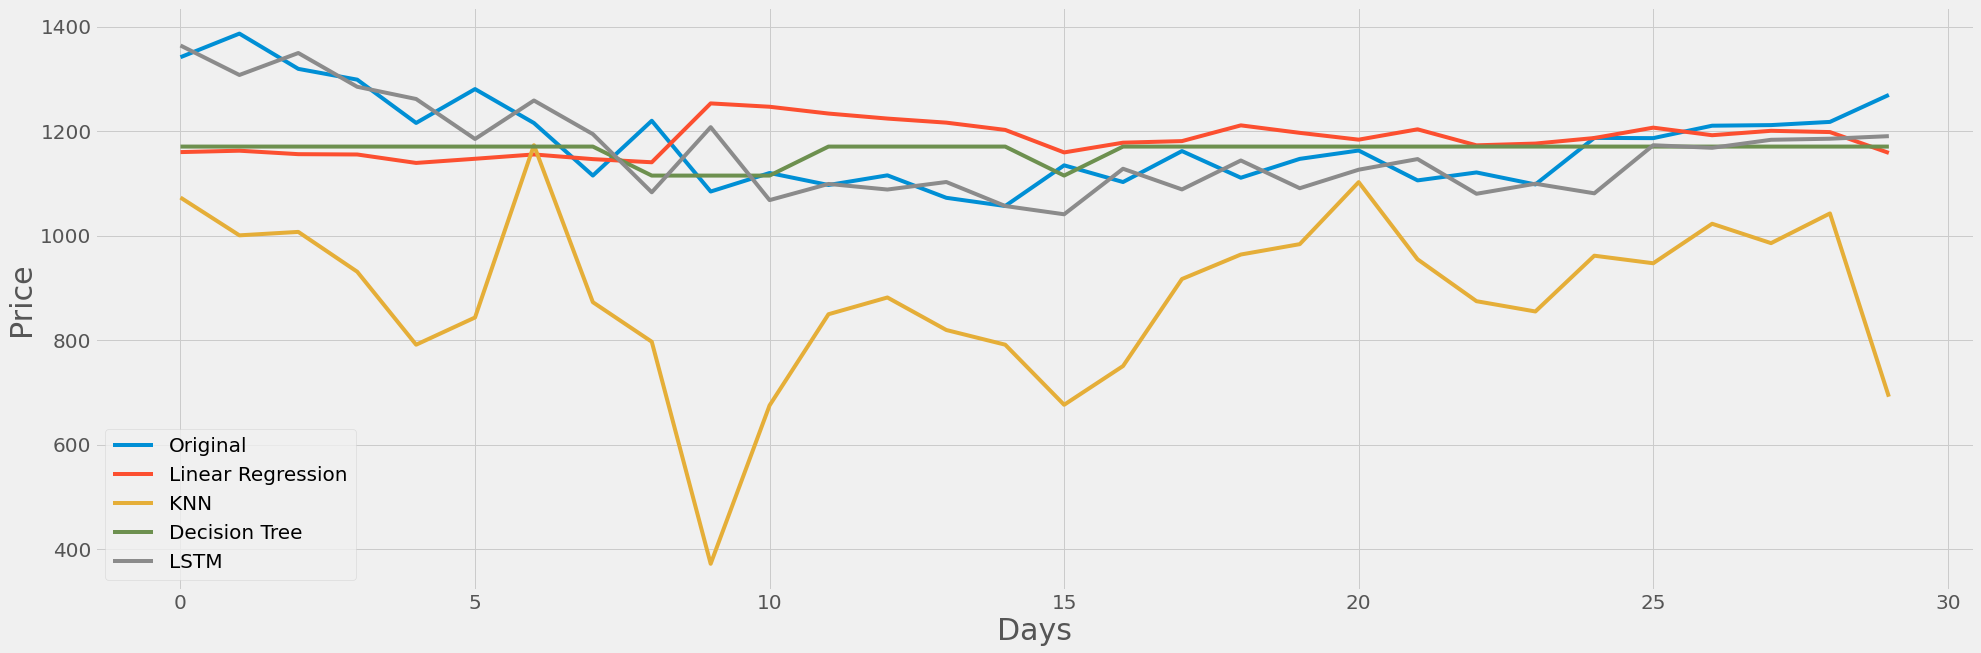

In [ ]:
predictions['Original'].plot(figsize = (30,10), fontsize = 20)
predictions['Linear Regression'].plot(figsize = (30,10), fontsize = 20)
predictions['KNN'].plot(figsize = (30,10), fontsize = 20)
predictions['Decision Tree'].plot(figsize = (30,10), fontsize = 20)
predictions['LSTM'].plot(figsize = (30,10), fontsize = 20)
plt.legend(['Original','Linear Regression', 'KNN', 'Decision Tree', 'LSTM'], fontsize=20)
plt.xlabel('Days', fontsize = 30)
plt.ylabel('Price', fontsize = 30)
plt.show()

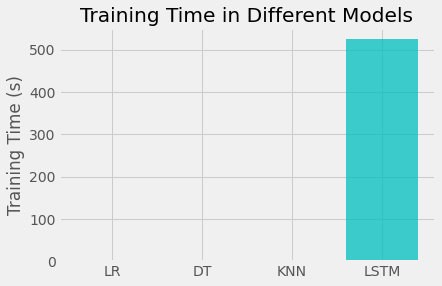

In [ ]:
objects = ('LR', 'DT', 'KNN', 'LSTM')
y_pos = np.arange(len(objects))
performance = [time_lr, time_dt, time_knn, total_lstm]

plt.bar(y_pos, performance, align='center', color='c', alpha = 0.75)
plt.xticks(y_pos, objects)
plt.ylabel('Training Time (s)')
plt.title('Training Time in Different Models')

plt.show()

In [ ]:
date= ['2020-03-17','2020-03-18','2020-03-19','2020-03-20','2020-03-23','2020-03-24','2020-03-25','2020-03-26','2020-03-27','2020-03-30',
       '2020-03-31','2020-04-01','2020-04-02','2020-04-03','2020-04-06','2020-04-07','2020-04-08','2020-04-09','2020-04-13','2020-04-14',
        '2020-04-15','2020-04-16','2020-04-17','2020-04-20','2020-04-21','2020-04-22','2020-04-23','2020-04-24','2020-04-27','2020-04-28',]

In [ ]:
days = [str(i) for i in date]

predictions = {'Original':original[10:41],
               'Linear Regression':lr.predict(X_old)[10:41],
              'KNN':knn.predict(X_old)[10:41],
              'Decision Tree':tree.predict(X_old)[10:41],
              'LSTM':lstm[10:41]}

predictions = pd.DataFrame(predictions)
print(days)
len(days)

['2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-27', '2020-04-28']


30

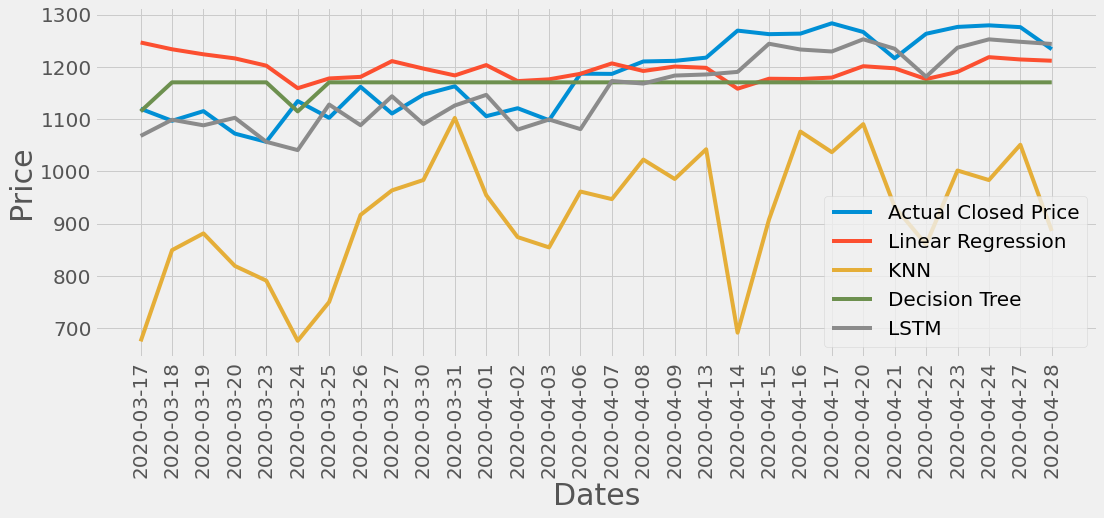

<Figure size 432x288 with 0 Axes>

In [ ]:
predictions['Original'].plot(figsize = (30,10), fontsize = 20)
predictions['Linear Regression'].plot(figsize = (30,10), fontsize = 20)
predictions['KNN'].plot(figsize = (30,10), fontsize = 20)
predictions['Decision Tree'].plot(figsize = (30,10), fontsize = 20)
predictions['LSTM'].plot(figsize = (30,10), fontsize = 20)
plt.legend(['Actual Closed Price','Linear Regression', 'KNN', 'Decision Tree', 'LSTM'], fontsize=20)

bars = days
y_pos = np.arange(len(bars))
 
# Create names
plt.xticks(y_pos, bars)
plt.xticks(rotation=90)


plt.xlabel('Dates', fontsize = 30)
plt.ylabel('Price', fontsize = 30)


fig = plt.gcf()
fig.set_size_inches(16,6)


plt.show()

plt.savefig("High resoltion.png",dpi=300)